In [3]:
import numpy as np
import multiSyncPy as msp
from multiSyncPy import synchrony_metrics as sm
from multiSyncPy import data_generation as dg
from matplotlib import pyplot as plt
import scipy
import pandas as pd
import os
from numpy import genfromtxt

In [4]:
def load(condition):
    filtered_files = []
    for file in os.listdir('/Users/wenboyi/Desktop/HR/RR/mdFNN/dummybaseline/'):
        if file.endswith(condition + '_bpm' + '.csv'):
            filtered_files.append(file)
    return filtered_files

In [5]:
# def sync(EKG_matrix, r):
#     rec, det, mean_length,max_length = sm.rqa_metrics(sm.recurrence_matrix(EKG_matrix, r))
#     entropy = sm.symbolic_entropy(EKG_matrix)
#     return rec, det, mean_length, max_length, entropy

In [6]:
#conditionlist = ['preconcert11','preconcert10','preconcert1','preconcert2','preconcert3','preconcert4','preconcert5','preconcert6','preconcert7','preconcert8','preconcert9']
conditionlist=['preconcert10']
reclist, detlist,mnlist,mxlist,elist,conditionl=[],[],[],[],[],[]
for condition in conditionlist:
    filtered_files = load(condition)
    EKG_total = []
    for filename in filtered_files:
        EKG = genfromtxt('/Users/wenboyi/Desktop/HR/RR/mdFNN/dummybaseline/' + filename, delimiter = ',')
        EKG_total.append(EKG)
    EKG_DF = np.asarray(EKG_total)
    x = EKG_DF.transpose()
    #print(x)
    #print(EKG_DF)
    np.savetxt('/Users/wenboyi/Desktop/HR/RR/mdFNN/dummybaseline/'+condition+ '_BPM_E_latest'+'.txt', x, delimiter=" ")
    #np.savetxt(condition+ '_BPM_new'+'.csv', EKG_DF, delimiter=",")
#     recl,detl,mnl,mxl,el = sync(EKG_DF,0.9)
#     reclist.append(recl)
#     detlist.append(detl)
#     mnlist.append(mnl)
#     mxlist.append(mxl)
#     elist.append(el)
#     conditionl.append(condition)

NameError: name 'sync' is not defined

In [5]:
newcsv = pd.DataFrame(conditionl, columns=['condition'])
newcsv['REC'] = reclist
newcsv['DET'] = detlist
newcsv['Mean_length'] = mnlist
newcsv['Max_length'] = mxlist
newcsv['Entropy'] = elist

#newcsv.to_csv('sync.csv')

5. Violin-isolated
- quartet played the Haydn excerpt while the 1st violinist was hidden behind a curtain; the others were allowed to look at each other normally

6. Repetition-rehearsal
- same as Normal-rehearsal

7. Sight-reading (prima vista)
- quartet played Langgaard’s String Quartet No. 5, 2nd movement, which they had never played or heard before

8. Mini-concert (Haydn)
- quartet played the full first movement of the Haydn for an audience of about 30 researchers; they were configured normally and allowed to look wherever they wanted

9. Mini-concert (Bach)
- quartet played the Bach Contrapunctus for the same audience as above, again with normal visual conditions

Sync: 6>5>8>7>9

BPM: 7>5>>6>8>9

ValueError: shape mismatch: objects cannot be broadcast to a single shape

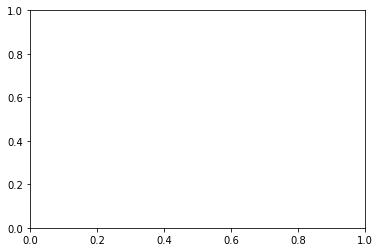

In [6]:
det = np.array(detlist) * 100
x = np.arange(0,10,1)
plt.bar(x,det)
print(conditionl)
print(det)

In [ ]:
rec = np.array(reclist) * 100
x = np.arange(0,10,1)
plt.bar(x,rec)
print(rec)

In [ ]:
plt.bar(x,mnlist)

In [ ]:
plt.bar(x,elist)